In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv("example_myo_leap.csv")

TypeError: read_csv() got an unexpected keyword argument 'index'

In [6]:
df = df.drop("Unnamed: 0",1)

In [7]:
df

,Channel_1,Channel_2,Channel_3,Channel_4,Channel_5,Channel_6,Channel_7,Channel_8,Thumb_tip_x,Thumb_tip_y,...,Middle_tip_z,Ring_tip_x,Ring_tip_y,Ring_tip_z,Pinky_tip_x,Pinky_tip_y,Pinky_tip_z,Palm_tip_x,Palm_tip_y,Palm_tip_z
0,38,137,252,47,82,37,49,26,-28.319761,-16.640947,...,-65.832779,-60.904514,-45.737530,32.716541,142.407608,179.258835,161.404037,142.359253,131.086624,153.190933
1,37,193,241,56,110,46,66,26,-29.013016,-17.264145,...,-64.789848,-60.724518,-45.208179,32.826344,143.013458,180.125107,159.375656,144.406281,132.459625,154.224121
2,36,231,240,61,127,50,77,29,-30.757153,-19.586367,...,-63.748894,-60.848701,-44.495045,33.189919,144.615738,177.187119,158.778259,152.645447,139.670181,156.457809
3,40,270,233,65,147,58,87,32,-31.533712,-21.167202,...,-63.427170,-60.824612,-44.134739,33.590324,145.410049,172.665878,159.363754,158.007797,145.079468,157.671356
4,43,299,192,68,160,65,89,33,-32.038170,-22.580877,...,-63.143574,-60.604069,-43.691769,34.116734,145.998032,167.030914,160.558273,162.919708,150.042374,158.940308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,34,86,252,62,59,37,21,35,-51.385471,-30.610399,...,-52.789204,-37.902042,-19.487713,47.128521,156.620453,206.753693,192.523880,143.862610,137.085342,166.974045
243,38,89,277,64,61,36,19,35,-51.385044,-30.786268,...,-52.694981,-38.371212,-19.977758,46.663834,156.613953,206.865402,192.457321,144.078598,137.636627,167.041672
244,41,93,298,63,63,40,21,36,-51.431416,-34.002293,...,-52.799461,-44.999554,-24.574821,43.330296,156.568268,206.068588,192.070068,155.272095,143.890472,168.111862
245,39,87,270,57,61,39,23,37,-51.512093,-35.772804,...,-53.036797,-48.232059,-27.934494,42.246258,156.508224,203.058212,191.621613,164.839355,150.670288,168.776489


In [10]:
df.mean()

Channel_1        40.259109
Channel_2       101.708502
Channel_3       188.275304
Channel_4        51.178138
Channel_5        57.275304
Channel_6        36.846154
Channel_7        31.105263
Channel_8        30.935223
Thumb_tip_x     -44.384840
Thumb_tip_y     -31.265267
Thumb_tip_z      -3.426947
Index_tip_x      20.835964
Index_tip_y      44.266589
Index_tip_z      16.199958
Middle_tip_x     15.201219
Middle_tip_y    -37.219920
Middle_tip_z    -55.308840
Ring_tip_x      -50.893732
Ring_tip_y      -33.504749
Ring_tip_z       41.628181
Pinky_tip_x     155.171014
Pinky_tip_y     178.839289
Pinky_tip_z     179.706903
Palm_tip_x      168.972667
Palm_tip_y      157.298214
Palm_tip_z      166.057784
dtype: float64

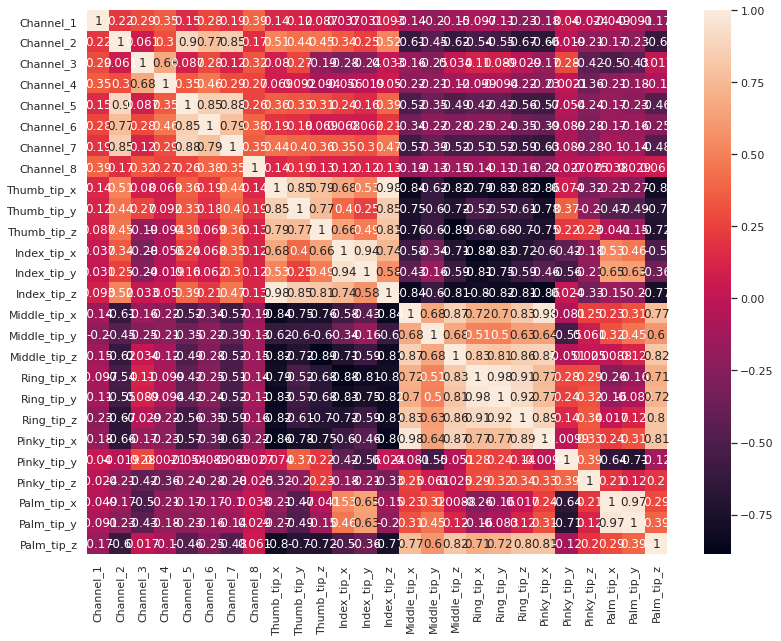

In [13]:
sns.set(rc={'figure.figsize':(13,10)})
sns.heatmap(df.corr(), annot=True)

As I never moved my palm during the collection of this dataset, this looks more promising. 

Now I will gather some data, where I only move my thumb.

In [14]:
df_t = pd.read_csv("thumb_move.csv")

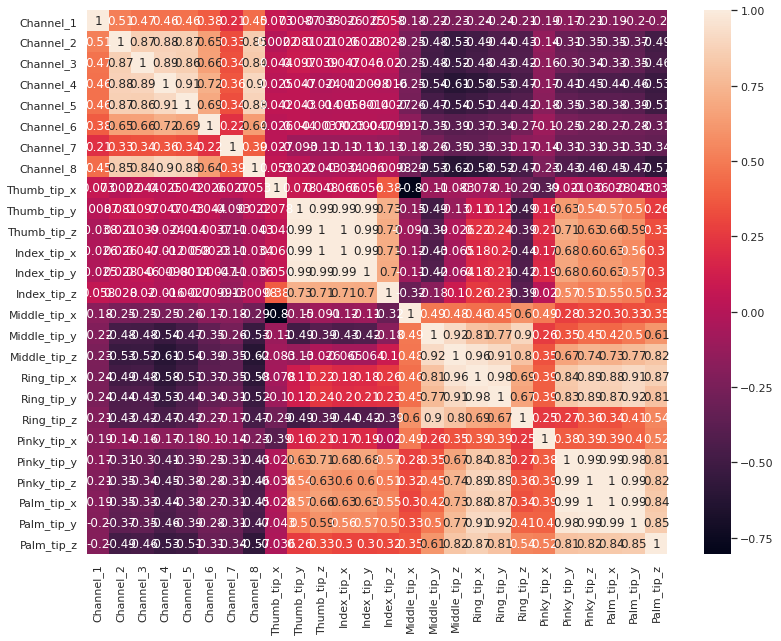

In [15]:
sns.heatmap(df_t.corr(), annot=True)

In [16]:
df_t.columns

Index(['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8', 'Thumb_tip_x', 'Thumb_tip_y',
       'Thumb_tip_z', 'Index_tip_x', 'Index_tip_y', 'Index_tip_z',
       'Middle_tip_x', 'Middle_tip_y', 'Middle_tip_z', 'Ring_tip_x',
       'Ring_tip_y', 'Ring_tip_z', 'Pinky_tip_x', 'Pinky_tip_y', 'Pinky_tip_z',
       'Palm_tip_x', 'Palm_tip_y', 'Palm_tip_z'],
      dtype='object')

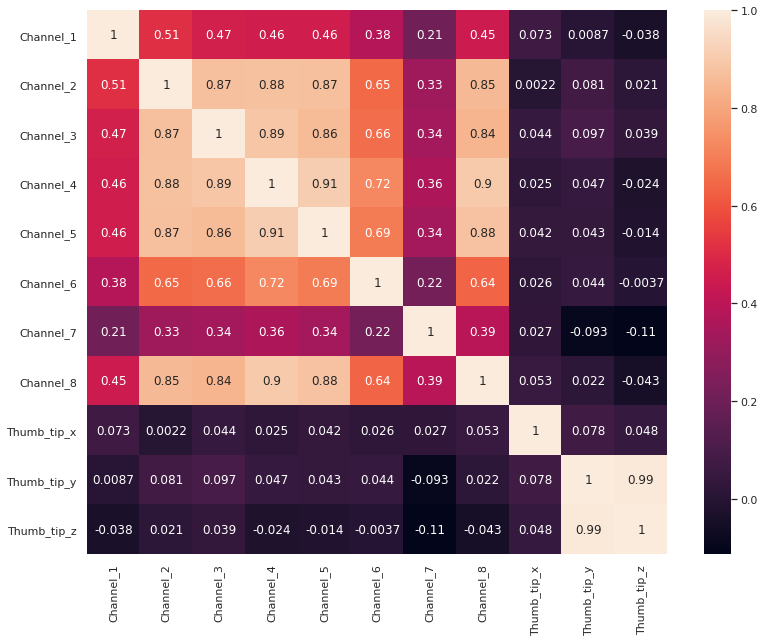

In [17]:
care_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8', 'Thumb_tip_x', 'Thumb_tip_y',
       'Thumb_tip_z']
sns.heatmap(df_t[care_cols].corr(), annot=True)

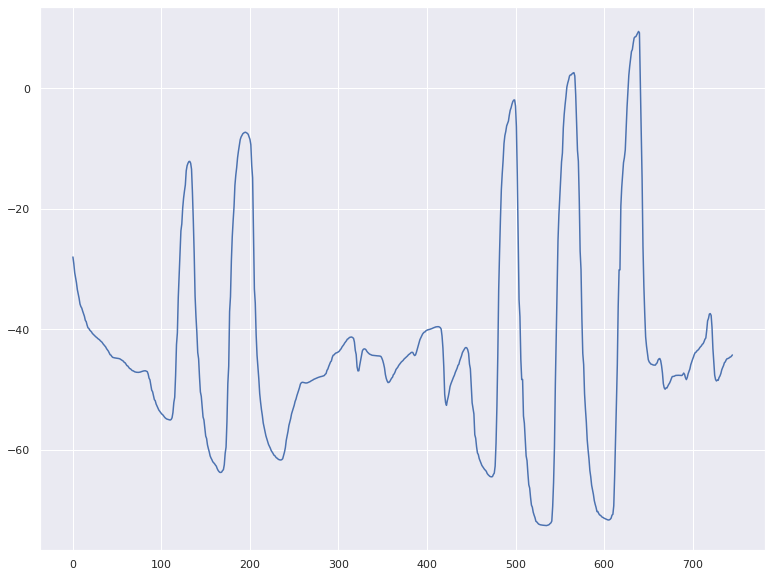

In [18]:
df_t['Thumb_tip_x'].plot()

## Preprocessing the thumb data

In [22]:
# Combine the data and record to a df
myo_cols = ["Channel_1", "Channel_2", "Channel_3", "Channel_4", "Channel_5", "Channel_6", "Channel_7", "Channel_8"]
leap_cols = []
finger_names = ['Thumb', 'Index', 'Middle', 'Ring', 'Pinky', 'Palm']
# We can of course generate column names on the fly:
for finger in finger_names:
    for dim in ["x","y","z"]:
        leap_cols.append(f"{finger}_tip_{dim}")
print(leap_cols)

['Thumb_tip_x', 'Thumb_tip_y', 'Thumb_tip_z', 'Index_tip_x', 'Index_tip_y', 'Index_tip_z', 'Middle_tip_x', 'Middle_tip_y', 'Middle_tip_z', 'Ring_tip_x', 'Ring_tip_y', 'Ring_tip_z', 'Pinky_tip_x', 'Pinky_tip_y', 'Pinky_tip_z', 'Palm_tip_x', 'Palm_tip_y', 'Palm_tip_z']


In [21]:
df_t

,Channel_1,Channel_2,Channel_3,Channel_4,Channel_5,Channel_6,Channel_7,Channel_8,Thumb_tip_x,Thumb_tip_y,...,Middle_tip_z,Ring_tip_x,Ring_tip_y,Ring_tip_z,Pinky_tip_x,Pinky_tip_y,Pinky_tip_z,Palm_tip_x,Palm_tip_y,Palm_tip_z
0,36,172,134,102,48,32,32,63,-27.997972,-27.724344,...,-69.774323,-67.194878,-52.796417,22.547295,139.434830,158.962387,155.610931,151.804703,144.502579,165.134613
1,44,246,180,139,69,39,30,76,-29.107536,-28.645296,...,-68.764763,-66.226997,-51.757175,23.317173,140.186996,160.048019,156.689270,152.943604,145.596603,166.112991
2,49,289,213,161,81,42,34,89,-30.598886,-29.857475,...,-67.442009,-64.953575,-50.372528,24.251373,141.226227,161.478287,158.108246,154.441025,147.087967,167.263779
3,50,333,244,180,93,47,34,101,-31.474146,-30.538195,...,-66.685165,-64.225136,-49.577026,25.022154,141.841934,162.307938,158.936539,155.270142,147.934525,167.759155
4,52,361,260,191,102,52,34,104,-32.291855,-31.128286,...,-66.013206,-63.588482,-48.889866,25.687162,142.422104,163.058945,159.678864,155.975632,148.649460,168.149933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,31,68,61,51,34,28,21,25,-44.806908,-27.833984,...,-57.757473,-52.688217,-34.367458,35.127979,203.758026,186.134979,182.735764,181.221207,178.052216,193.078812
742,30,67,57,42,34,28,21,26,-44.663189,-27.830790,...,-57.758854,-52.688133,-34.366184,35.224369,203.616211,186.141586,182.762466,181.222046,178.056519,193.087692
743,32,64,65,39,32,25,21,24,-44.620277,-27.829865,...,-57.759033,-52.688107,-34.365738,35.258743,203.560287,186.143600,182.770447,181.222198,178.057724,193.095078
744,29,57,69,36,34,26,22,23,-44.474316,-27.826952,...,-57.758961,-52.688038,-34.364586,35.354088,203.275955,186.149857,182.790863,181.222427,178.060287,193.077682


In [23]:
leap_cols

['Thumb_tip_x',
 'Thumb_tip_y',
 'Thumb_tip_z',
 'Index_tip_x',
 'Index_tip_y',
 'Index_tip_z',
 'Middle_tip_x',
 'Middle_tip_y',
 'Middle_tip_z',
 'Ring_tip_x',
 'Ring_tip_y',
 'Ring_tip_z',
 'Pinky_tip_x',
 'Pinky_tip_y',
 'Pinky_tip_z',
 'Palm_tip_x',
 'Palm_tip_y',
 'Palm_tip_z']

In [29]:
thumb_df = df_t[care_cols]

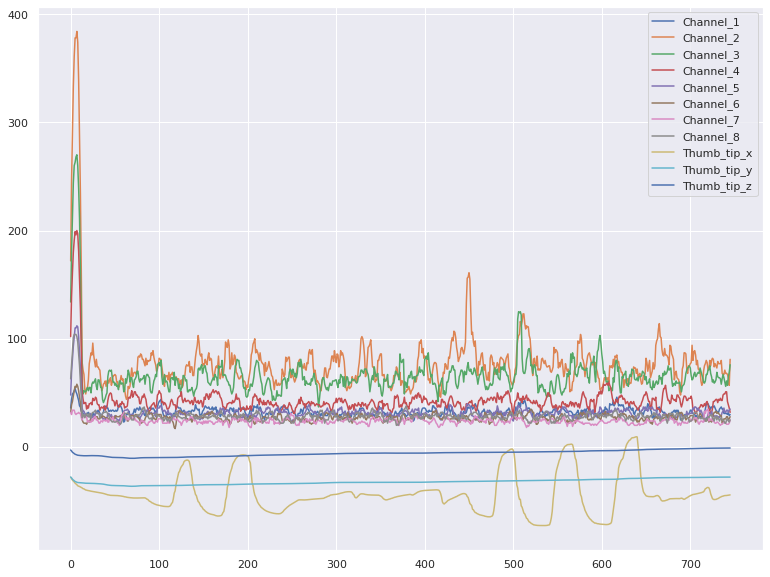

In [30]:
thumb_df.plot()

We can see no clear correlation in this data, but there seems to be some anomaly data at the start. 

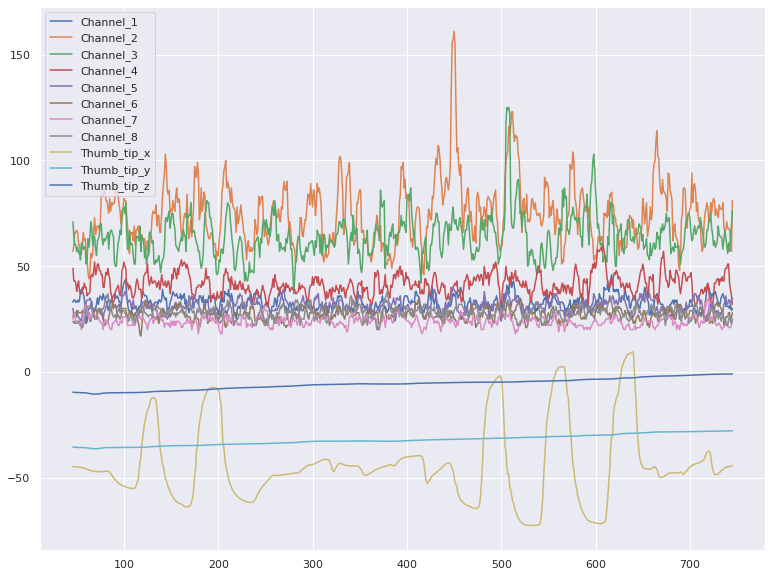

In [31]:
thumb_df = thumb_df.tail(700)
thumb_df.plot()

Due to the lack of correlations and movement in the thumb in the y and z directions, my hand position may not have been good enough for the leap motion. 

Data from this point has been gathered with: https://github.com/PerlinWarp/NeuroLeap/commit/81af37a0db2af09f7fe8c5a0e6b62f5cdaf8bf28